In [2]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [3]:
X[:5, :]

array([[-2.17000301],
       [ 0.88606305],
       [ 0.54263164],
       [ 2.12885827],
       [-1.91695323]])

In [4]:
X2[:5, :]

array([[ 1.        , -2.17000301,  4.70891305],
       [ 1.        ,  0.88606305,  0.78510772],
       [ 1.        ,  0.54263164,  0.29444909],
       [ 1.        ,  2.12885827,  4.53203754],
       [ 1.        , -1.91695323,  3.6747097 ]])

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

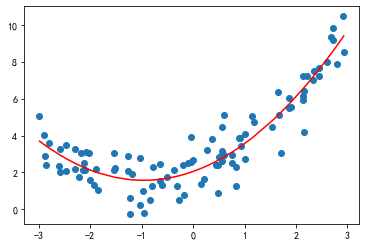

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [8]:
lin_reg2.coef_

array([0.        , 0.99526351, 0.51886223])

In [9]:
lin_reg2.intercept_

2.052250550890121

#### Pipeline

In [12]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [13]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

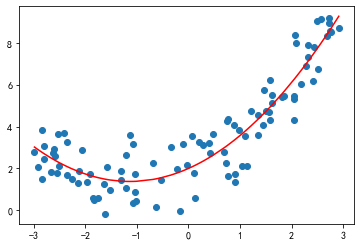

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()